## Import Libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Load Dataset

In [54]:
dataset = pd.read_csv("Desktop\IRIS.csv")
name = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

# Summarize the Dataset 

## Dimension of Dataset..

In [14]:
# Shap 
dataset.shape

(150, 5)

## Peek at the Data

In [55]:
# Head
dataset.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Statistical Summary

In [16]:
# descriptions
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Class Distribution

In [56]:
# class distribution
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Data Visualization

## Univariate Plots

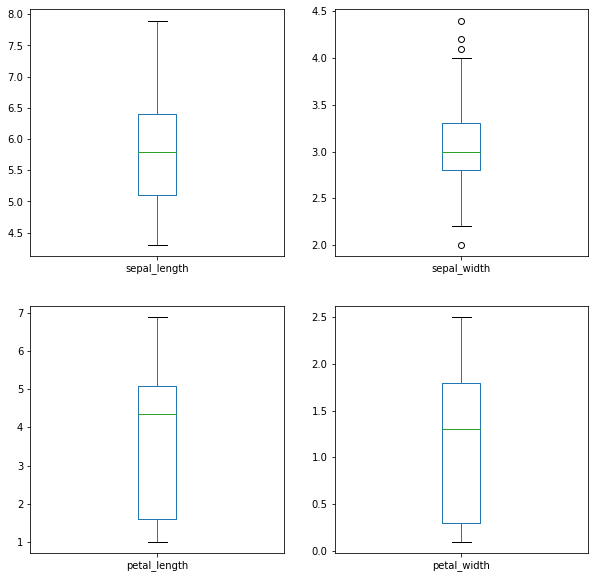

In [35]:
# box and whisker plots
dataset.plot(kind='box',figsize = (10,10), subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

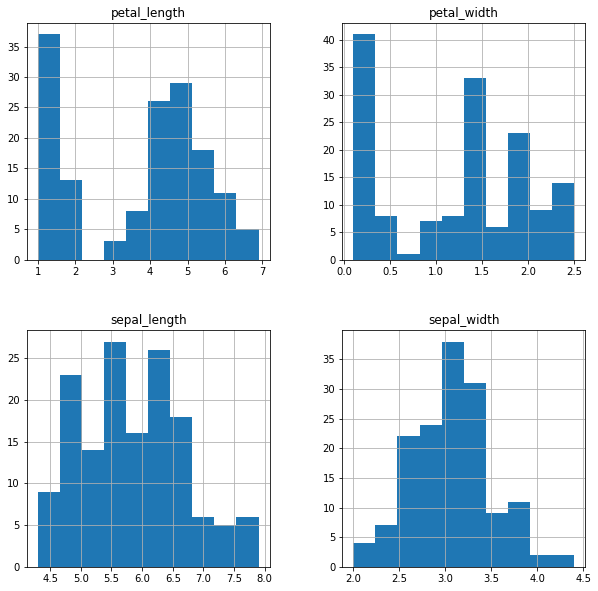

In [34]:
# histograms
dataset.hist(figsize =(10,10))
plt.show()

## Multivariate Polts

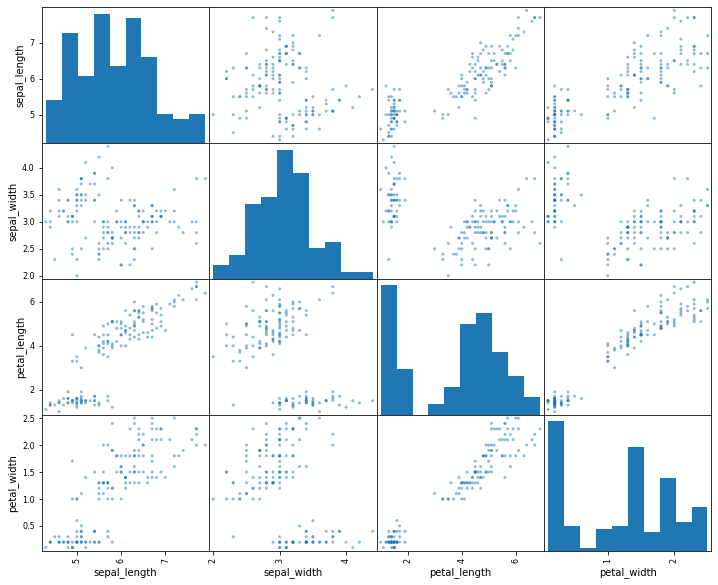

In [40]:
# Scatter plot matrix
scatter_matrix(dataset, figsize = (12,10))
plt.show()

# Evaluate Some Algorithms

## Create a Validation Dataset

In [42]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train,X_validation,Y_train,Y_validation = train_test_split(X, Y, test_size = 0.20, random_state = 1)

## Test Harness

we will use stratified 10-fold cross validation to estimate model accuracy

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train_test_splits.

## Build Models

We don't know which algorithms would be good on this problem or what configuration to use. 

We get an idea from the plots that some of the classes are partially linearly separable in some dimention,
so we are expecting generally good results.

Lets test 6 different algorithms:
    * Logistic Regression (LR)
    * Linear Discriminant Analysis (LDA)
    * K-Nearest Neighbors (KNN)
    * Classification and Regression Trees (CART)
    * Gaussian Naive Bayes (NB)
    * Support Vector Machines (SVM)

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [51]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [58]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


## Select Best Model

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

In this case, we can see that it looks like Support Vector Machines (SVM) has the largest estimated accuracy score at
about 0.98 or 98%

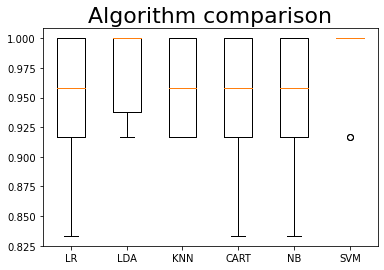

In [79]:
# Compare Algorithms
plt.boxplot(results, labels = names)
plt.title('Algorithm comparison', size = 22)
plt.show()

We can see that the box and whisker plots are squashed at the top of the range, with many evaluations achieving 100% accuracy, and some pushing down into the high 80% accuracies.

# Make Predictions

We must choose an algorithm to use to make predictions.

The results in the pevious sections suggest that the SVM was perhaps the most accurate model. We will use this model as our final model.

## Make Predictions 

In [75]:
# make predictions on validation dataset
model = SVC (gamma = 'auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

## Evaluate Predictions

In [78]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



 We can see that the accuracy is 0.966 or about 96% on the hold out dataset.
 
 The confusion matrix provides an indication of the errors made.
 
 Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing results (granted the validation dataset was small).